In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
customerdetails = pd.read_csv("customer_details.csv")

customerpolicydetails = pd.read_csv("customer_policy_details.csv")

headers = ['customer_id','Gender','age','driving licence present','region code','previously insured','vehicle age','vehicle damage']

customerdetails.columns=headers

customerdetails.head()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [2]:
# Adding columns to customer policy details table
customerpolicydetails.columns=['customer_id','annual premium (in Rs)','sales channel code','vintage','responce']

customerpolicydetails.head()

,customer_id,annual premium (in Rs),sales channel code,vintage,responce
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


# 2.Checking and Cleaning Data Quality:
# NULL Values

# Generate a summary of count of all the null values column wise

In [3]:
# the column wise count of null values on customer details table

customerdetails_null = customerdetails.isnull()
for i in customerdetails_null.columns.values.tolist():
    print(i)
    print(customerdetails_null[i].value_counts())
    print("")

customer_id
customer_id
False    380723
True        386
Name: count, dtype: int64

Gender
Gender
False    380741
True        368
Name: count, dtype: int64

age
age
False    380741
True        368
Name: count, dtype: int64

driving licence present
driving licence present
False    380716
True        393
Name: count, dtype: int64

region code
region code
False    380717
True        392
Name: count, dtype: int64

previously insured
previously insured
False    380728
True        381
Name: count, dtype: int64

vehicle age
vehicle age
False    380728
True        381
Name: count, dtype: int64

vehicle damage
vehicle damage
False    380702
True        407
Name: count, dtype: int64



In [4]:
# the column wise count of null values on customer policy details table

customerpolicydetails_null = customerpolicydetails.isnull()

for i in customerpolicydetails_null.columns.values.tolist():
    print(i)
    print(customerpolicydetails_null[i].value_counts())
    print("")


customer_id
customer_id
False    380722
True        387
Name: count, dtype: int64

annual premium (in Rs)
annual premium (in Rs)
False    380763
True        346
Name: count, dtype: int64

sales channel code
sales channel code
False    380709
True        400
Name: count, dtype: int64

vintage
vintage
False    380721
True        388
Name: count, dtype: int64

responce
responce
False    380748
True        361
Name: count, dtype: int64



# Drop Null values for customer_id because central tendencies for id’s is not feasible.

In [5]:
# Dropping the rows that contains null values of customr_id on customer details table
customerdetails.dropna(subset=['customer_id'], axis=0,inplace=True)

# resetting index because some rows deleted
customerdetails.reset_index(drop = True, inplace = True)

In [6]:
# Dropping the rows that contains null values of customr_id on customer policy details table
customerpolicydetails.dropna(subset=['customer_id'], axis=0,inplace=True)

# resetting index because some rows deleted
customerpolicydetails.reset_index(drop = True, inplace = True)

# Replacing all null values for numeric columns by mean

In [7]:
customerdetails.head()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [8]:
# Replacing the NaN values of age by its mean value

customerdetails['age'].fillna(customerdetails['age'].mean(),inplace = True)


# Replacing the NaN values of region code by its mean value

customerdetails['region code'].fillna(customerdetails['region code'].mean(),inplace = True)

customerpolicydetails.head()

,customer_id,annual premium (in Rs),sales channel code,vintage,responce
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [9]:
# Replacing the NaN values of annual premium by its mean value
customerpolicydetails['annual premium (in Rs)'].fillna(customerpolicydetails['annual premium (in Rs)'].mean(),inplace = True)

# Replacing the NaN values of sales channel code by its mean value
customerpolicydetails['sales channel code'].fillna(customerpolicydetails['sales channel code'].mean(),inplace = True)

# Replacing the NaN values of vintage by its mean value
customerpolicydetails['vintage'].fillna(customerpolicydetails['vintage'].mean(),inplace = True)

# Repalcing categorical null values by its mode

In [10]:
# it replaces the null values with the value which exist maximum no of times i.e. mode
customerdetails['driving licence present'].fillna (customerdetails['driving licence present'].mode()[0], inplace=True)

# it replaces the null values with the value which exist maximum no of times i.e. mode
customerdetails['previously insured'].fillna (customerdetails['previously insured'].mode()[0], inplace=True)
 

# it replaces the null values with the value which exist maximum no of times i.e. mode

customerpolicydetails['responce'].fillna(customerpolicydetails['responce'].mode()[0], inplace=True)

In [11]:
customerdetails

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
380718,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
380719,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
380720,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
380721,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [12]:
customerpolicydetails

,customer_id,annual premium (in Rs),sales channel code,vintage,responce
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
380717,381105.0,30170.0,26.0,88.0,0.0
380718,381106.0,40016.0,152.0,131.0,0.0
380719,381107.0,35118.0,160.0,161.0,0.0
380720,381108.0,44617.0,124.0,74.0,0.0


In [13]:
customerpolicydetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380722 entries, 0 to 380721
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id             380722 non-null  float64
 1   annual premium (in Rs)  380722 non-null  float64
 2   sales channel code      380722 non-null  float64
 3   vintage                 380722 non-null  float64
 4   responce                380722 non-null  float64
dtypes: float64(5)
memory usage: 14.5 MB


In [14]:
customerdetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380723 entries, 0 to 380722
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   customer_id              380723 non-null  float64
 1   Gender                   380355 non-null  object 
 2   age                      380723 non-null  float64
 3   driving licence present  380723 non-null  float64
 4   region code              380723 non-null  float64
 5   previously insured       380723 non-null  float64
 6   vehicle age              380342 non-null  object 
 7   vehicle damage           380317 non-null  object 
dtypes: float64(5), object(3)
memory usage: 23.2+ MB


# OUTLIERS

# Generate summary of Count of all the Outliers column wise

In [15]:
customerdetails.describe()

,customer_id,age,driving licence present,region code,previously insured
count,380723.000000,380723.000000,380723.000000,380723.000000,380723.000000
mean,190548.776244,38.822788,0.997870,26.389436,0.457800
std,110016.805160,15.504826,0.046105,13.223671,0.498217
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95269.500000,25.000000,1.000000,15.000000,0.000000
50%,190543.000000,36.000000,1.000000,28.000000,0.000000
75%,285822.500000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


In [16]:
customerpolicydetails.describe()

,customer_id,annual premium (in Rs),sales channel code,vintage,responce
count,380722.000000,380722.000000,380722.000000,380722.000000,380722.000000
mean,190547.491663,30563.999774,112.036687,154.347192,0.122410
std,110013.824148,17190.147550,54.177046,83.628096,0.327759
min,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,95276.250000,24416.000000,29.000000,82.000000,0.000000
50%,190536.500000,31656.000000,131.000000,154.000000,0.000000
75%,285818.750000,39391.750000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,163.000000,299.000000,1.000000


In [17]:
q1=customerpolicydetails.quantile(0.25)
q3=customerpolicydetails.quantile(0.75)
iqr=q3-q1
l=q1-(1.5*iqr)
u=q3+(1.5*iqr)
((customerpolicydetails<l)|(customerpolicydetails>u)).sum()

customer_id                   0
annual premium (in Rs)    10332
sales channel code            0
vintage                       0
responce                  46604
dtype: int64

# Replacing the outliers with mean values

In [18]:
def replace_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    upper = df[~(df>(q3+1.5*iqr))].max()
    lower = df[~(df<(q1-1.5*iqr))].min()
    df = np.where(df>upper,df.mean(),np.where(df<lower,df.mean(),df))
    return df
 

customerpolicydetails['annual premium (in Rs)'] = replace_outlier(customerpolicydetails['annual premium (in Rs)'])

In [19]:
customerpolicydetails

,customer_id,annual premium (in Rs),sales channel code,vintage,responce
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
380717,381105.0,30170.0,26.0,88.0,0.0
380718,381106.0,40016.0,152.0,131.0,0.0
380719,381107.0,35118.0,160.0,161.0,0.0
380720,381108.0,44617.0,124.0,74.0,0.0


# Remove white spaces

In [20]:
customerdetails.apply(lambda x: x.str.strip() if x.dtype=='object' else x)

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
380718,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
380719,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
380720,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
380721,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


# Case Correction

In [21]:
# convert all the characters to upper case.

customerdetails.apply(lambda x: x.str.upper() if x.dtype=='object' else x)


,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,YES
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,NO
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,YES
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,NO
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,NO
...,...,...,...,...,...,...,...,...
380718,381105.0,MALE,74.0,1.0,26.0,1.0,1-2 YEAR,NO
380719,381106.0,MALE,30.0,1.0,37.0,1.0,< 1 YEAR,NO
380720,381107.0,MALE,21.0,1.0,30.0,1.0,< 1 YEAR,NO
380721,381108.0,FEMALE,68.0,1.0,14.0,0.0,> 2 YEARS,YES


# Convert nominal data into dummy variables

In [22]:
dummy_variable_1 = pd.get_dummies(customerdetails["vehicle damage"]) 

dummy_variable_1.head()

,No,Yes
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False


In [23]:
# Changing the column names for dummy variable

dummy_variable_1.rename(columns={'No':'vehicle-damage-No', 'Yes':'vehicle-damage-Yes'}, inplace=True)

dummy_variable_1.head()

,vehicle-damage-No,vehicle-damage-Yes
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False


# Drop Duplicates.


In [24]:
customerpolicydetails.drop_duplicates()
customerpolicydetails.head()

,customer_id,annual premium (in Rs),sales channel code,vintage,responce
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [25]:
customerdetails.drop_duplicates()
customerdetails.head()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


# 3. Merging the data sets.

In [26]:
master_data = pd.merge(customerdetails,customerpolicydetails,on='customer_id')

In [27]:
master_data

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage,annual premium (in Rs),sales channel code,vintage,responce
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No,30170.0,26.0,88.0,0.0
380332,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No,40016.0,152.0,131.0,0.0
380333,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No,35118.0,160.0,161.0,0.0
380334,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0.0


# 4. getting required data for decisions

# Gender wise average annual premium

In [28]:
gender_data = master_data.groupby('Gender')['annual premium (in Rs)'].mean()

In [29]:
gender_data

Gender
Female    29273.474247
Male      29323.022594
Name: annual premium (in Rs), dtype: float64

<Axes: xlabel='Gender'>

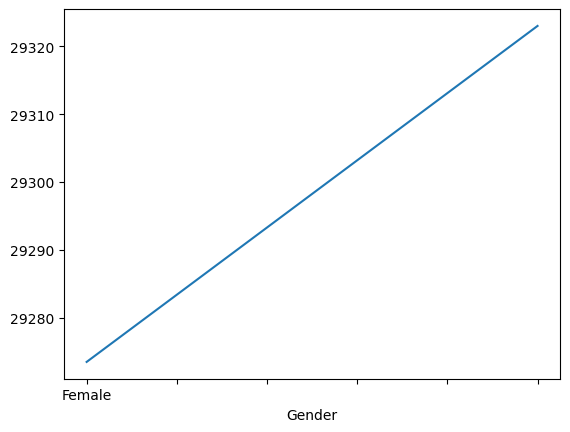

In [30]:
gender_data.plot()

<Axes: xlabel='Gender'>

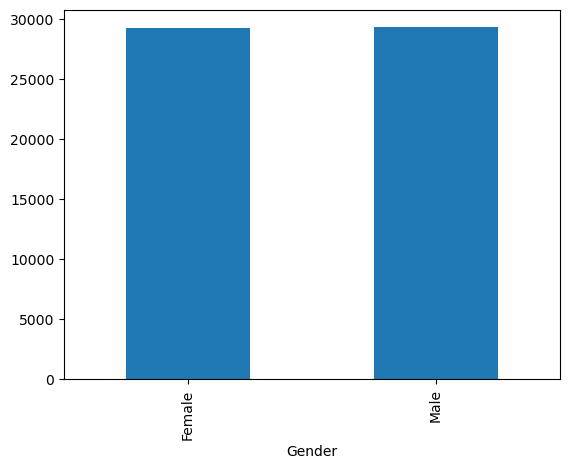

In [31]:
gender_data.plot.bar()

# age wise average annual premium

In [32]:
age_data = master_data.groupby('age')['annual premium (in Rs)'].mean()

age_data

age
20.0    26342.073517
21.0    29751.791916
22.0    29946.848634
23.0    29838.344763
24.0    30125.557096
            ...     
81.0    29287.910702
82.0    36480.586199
83.0    28995.818172
84.0    35440.818182
85.0    26637.454525
Name: annual premium (in Rs), Length: 67, dtype: float64

<Axes: xlabel='age'>

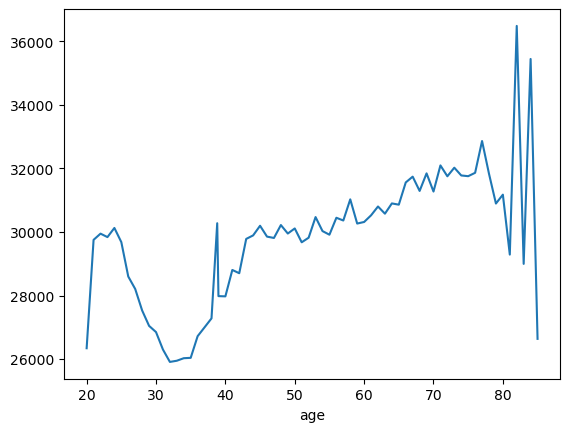

In [33]:
age_data.plot()

#  Checking Balanced between gender or not..

In [34]:
master_data.groupby('Gender').count()

,customer_id,age,driving licence present,region code,previously insured,vehicle age,vehicle damage,annual premium (in Rs),sales channel code,vintage,responce
Gender,,,,,,,,,,,
Female,174485,174485,174485,174485,174485,174309,174300,174485,174485,174485,174485
Male,205484,205484,205484,205484,205484,205279,205266,205484,205484,205484,205484


# Vehicle age wise average annual premium

In [35]:
vehicle_age = master_data.groupby('vehicle age')['annual premium (in Rs)'].mean()

vehicle_age

vehicle age
1-2 Year     29099.066738
< 1 Year     29188.150594
> 2 Years    32943.540830
Name: annual premium (in Rs), dtype: float64

<Axes: xlabel='vehicle age'>

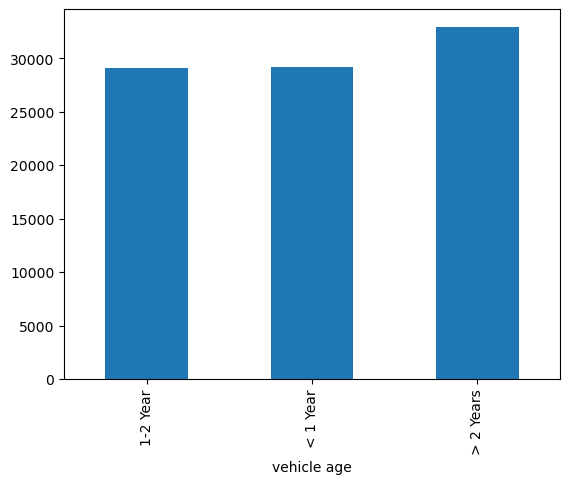

In [36]:
vehicle_age.plot.bar()

# 5. Correlation between age and annual premuim
# Pearson Correlation
# The Pearson Correlation measures the linear dependence between two variables X and Y.

# The resulting coefficient is a value between -1 and 1 inclusive, where:

# 1: Perfect positive linear correlation.
# 0: No linear correlation, the two variables most likely do not affect each other.
# -1: Perfect negative linear correlation.
# Correlation coefficient < -0.5 - Strong negative relationship

# Correlation coefficient > 0.5 - Strong positive relationship

# -0.5 < Correlation coefficient < 0.5 - There is no relationship.

 

In [37]:
master_data.corr()

ValueError: could not convert string to float: 'Male'

In [38]:
# finding the correlation coefficient in pandas
master_data['age'].corr(master_data['annual premium (in Rs)'])


0.050657589286175454

In [39]:
# Matrix form of correlation
master_data[['age','annual premium (in Rs)']].corr()


,age,annual premium (in Rs)
age,1.000000,0.050658
annual premium (in Rs),0.050658,1.000000
